In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
df = pd.read_csv('/Users/jordanwright/data_analysis_projects/ai_jobs.csv')
df.head()

,job_id,job_title,company_type,industry,country,city,remote_type,experience_level,min_experience_years,salary_min_usd,salary_max_usd,employment_type,posted_year,company_size
0,0IFD0TVBDIVU,MLOps Engineer,Research Lab,Education,Australia,Remote,Remote,Entry,0,56873,72223,Full-time,2023,Large
1,ZMF8MDD4V30T,Data Analyst,Startup,Education,Germany,Remote,Remote,Entry,0,54803,85599,Full-time,2024,Medium
2,CX1945NQ4FMY,MLOps Engineer,Research Lab,Tech,Canada,Remote,Remote,Senior,5,149980,175806,Full-time,2021,Large
3,QJ7YHL1C32OC,Applied Scientist,Research Lab,Healthcare,Australia,Remote,Remote,Entry,0,53483,86477,Full-time,2023,Medium
4,F0T0PVN9ER14,Machine Learning Engineer,Research Lab,Finance,Australia,Sydney,Hybrid,Mid,2,102977,127298,Full-time,2023,Large


In [77]:
df2 = pd.read_csv('/Users/jordanwright/data_analysis_projects/ai_job_trends.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')
df['job_title'] = df['job_title'].astype(str).str.lower().str.strip().str.replace('_', ' ')
df2['job_title'] = df2['job_title'].astype(str).str.lower().str.strip().str.replace('_', ' ')
df2.head()

,job_title,industry,job_status,ai_impact_level,median_salary_(usd),required_education,experience_required_(years),job_openings_(2024),projected_openings_(2030),remote_work_ratio_(%),automation_risk_(%),location,gender_diversity_(%)
0,investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [78]:
combined = pd.merge(df2, df, how='left', on='job_title')
combined.head(10)

,job_title,industry_x,job_status,ai_impact_level,median_salary_(usd),required_education,experience_required_(years),job_openings_(2024),projected_openings_(2030),remote_work_ratio_(%),automation_risk_(%),location,gender_diversity_(%),job_id,company_type,industry_y,country,city,remote_type,experience_level,min_experience_years,salary_min_usd,salary_max_usd,employment_type,posted_year,company_size
0,investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,legal secretary,Education,Decreasing,Low,39123.32,Master’s Degree,20,6985,7832,77.50,28.99,USA,46.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"surveyor, insurance",Manufacturing,Decreasing,High,147150.03,High School,7,9738,4360,30.51,7.08,UK,20.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,dentist,Entertainment,Decreasing,High,64245.48,Associate Degree,0,1393,8206,9.74,2.49,Canada,59.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,emergency planning/management officer,Education,Increasing,High,72488.15,High School,12,7729,4452,38.77,99.56,Australia,60.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,visual merchandiser,Manufacturing,Decreasing,Moderate,95840.30,Associate Degree,16,1127,2375,4.29,69.03,China,48.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
columns_to_drop = ['job_id', 'industry_y', 'city', 'posted_year']
combined.drop(columns=columns_to_drop, inplace=True)
cat_cols = ['company_type', 'country', 'remote_type', 'experience_level', 'employment_type', 'company_size', 'min_experience_years']
combined[cat_cols] = combined[cat_cols].fillna('Unknown')
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315906 entries, 0 to 315905
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   job_title                    315906 non-null  object 
 1   industry_x                   315906 non-null  object 
 2   job_status                   315906 non-null  object 
 3   ai_impact_level              315906 non-null  object 
 4   median_salary_(usd)          315906 non-null  float64
 5   required_education           315906 non-null  object 
 6   experience_required_(years)  315906 non-null  int64  
 7   job_openings_(2024)          315906 non-null  int64  
 8   projected_openings_(2030)    315906 non-null  int64  
 9   remote_work_ratio_(%)        315906 non-null  float64
 10  automation_risk_(%)          315906 non-null  float64
 11  location                     315906 non-null  object 
 12  gender_diversity_(%)         315906 non-null  float64
 13 

In [80]:
combined_nonull = combined.dropna()
combined_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285940 entries, 923 to 313211
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   job_title                    285940 non-null  object 
 1   industry_x                   285940 non-null  object 
 2   job_status                   285940 non-null  object 
 3   ai_impact_level              285940 non-null  object 
 4   median_salary_(usd)          285940 non-null  float64
 5   required_education           285940 non-null  object 
 6   experience_required_(years)  285940 non-null  int64  
 7   job_openings_(2024)          285940 non-null  int64  
 8   projected_openings_(2030)    285940 non-null  int64  
 9   remote_work_ratio_(%)        285940 non-null  float64
 10  automation_risk_(%)          285940 non-null  float64
 11  location                     285940 non-null  object 
 12  gender_diversity_(%)         285940 non-null  float64
 13  co

In [81]:
pd.set_option('display.max_columns', None)

In [82]:

combined_nonull['job_status_binary'] = combined_nonull['job_status'].map({'Increasing': 1, 'Decreasing': 0})

X = combined_nonull[['automation_risk_(%)', 'median_salary_(usd)', 'remote_work_ratio_(%)']]
y = combined_nonull['job_status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
X_with_const = sm.add_constant(X_train)
sm_model = sm.Logit(y_train, X_with_const).fit()
combined_nonull['job_status_binary'] = combined_nonull['job_status'].map({'Increasing': 1, 'Decreasing': 0})
X = combined_nonull[['automation_risk_(%)', 'median_salary_(usd)', 'remote_work_ratio_(%)']]
y = combined_nonull['job_status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
X_with_const = sm.add_constant(X_train)
sm_model = sm.Logit(y_train, X_with_const).fit()

sm_model.summary()


/var/folders/c4/pbnrbtss2jn0wdrdn6ywv2rh0000gn/T/ipykernel_71393/608433544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_nonull['job_status_binary'] = combined_nonull['job_status'].map({'Increasing': 1, 'Decreasing': 0})


Optimization terminated successfully.
         Current function value: 0.637251
         Iterations 5


/var/folders/c4/pbnrbtss2jn0wdrdn6ywv2rh0000gn/T/ipykernel_71393/608433544.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_nonull['job_status_binary'] = combined_nonull['job_status'].map({'Increasing': 1, 'Decreasing': 0})


Optimization terminated successfully.
         Current function value: 0.637251
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      job_status_binary   No. Observations:               200158
Model:                          Logit   Df Residuals:                   200154
Method:                           MLE   Df Model:                            3
Date:                Mon, 16 Feb 2026   Pseudo R-squ.:                 0.07828
Time:                        18:48:32   Log-Likelihood:            -1.2755e+05
converged:                       True   LL-Null:                   -1.3838e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.9492      0.026    111.981      0.000       2.898       3.001
automation_risk_(%)      -0.0225      0.000   -116.573      0.000      -0.023      -0.022
median_salary_(usd)   -6.285e-06   1.55e-07    -40.434      0.000   -6.59e-06   -5.98e-06
remote_work_ratio_(%)    -0.0207      0.000   -110.659      0.000      -0.021      -0.020
=========================================================================================
"""

In [83]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55     40446
           1       0.62      0.73      0.67     45336

    accuracy                           0.62     85782
   macro avg       0.62      0.61      0.61     85782
weighted avg       0.62      0.62      0.61     85782

[[20211 20235]
 [12461 32875]]


In [95]:
combined_nonull = combined_nonull.rename(columns={
    'job_openings_(2024)': 'job_openings_2024',
    'automation_risk_(%)': 'automation_risk_percent',
    'median_salary_(usd)': 'median_salary_usd',
    'remote_work_ratio_(%)': 'remote_work_ratio_percent',
    'projected_openings_(2030)': 'projected_openings_2030'
})

model_anova = ols('job_openings_2024 ~ C(experience_level) * C(remote_type)', data=combined_nonull).fit()
model_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      job_openings_2024   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 2.213e-09
Date:                Tue, 17 Feb 2026   Prob (F-statistic):               1.00
Time:                        12:01:40   Log-Likelihood:            -2.6923e+06
No. Observations:              285940   AIC:                         5.385e+06
Df Residuals:                  285931   BIC:                         5.385e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                               5166.2647     16.698    309.395      0.000    5133.537    5198.992
C(experience_level)[T.Mid]                              5.199e-11     23.777   2.19e-12      1.000     -46.602      46.602
C(experience_level)[T.Senior]                           2.635e-11     23.577   1.12e-12      1.000     -46.210      46.210
C(remote_type)[T.Onsite]                                2.812e-11     23.472    1.2e-12      1.000     -46.004      46.004
C(remote_type)[T.Remote]                                2.573e-11     23.545   1.09e-12      1.000     -46.148      46.148
C(experience_level)[T.Mid]:C(remote_type)[T.Onsite]    -6.471e-11     33.597  -1.93e-12      1.000     -65.850      65.850
C(experience_level)[T.Senior]:C(remote_type)[T.Onsite] -2.334e-11     33.388  -6.99e-13      1.000     -65.441      65.441
C(experience_level)[T.Mid]:C(remote_type)[T.Remote]    -6.939e-11     33.209  -2.09e-12      1.000     -65.089      65.089
C(experience_level)[T.Senior]:C(remote_type)[T.Remote] -1.716e-11     33.224  -5.17e-13      1.000     -65.117      65.117
==============================================================================
Omnibus:                  2808752.154   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23325.053
Skew:                          -0.072   Prob(JB):                         0.00
Kurtosis:                       1.608   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Logistic Regression revealed significant downward pressure on job growth from AI risk, median salary, and remote work ratio (p = 0.000).  The model has a recall of 0.73, so it is a modest predictor of job growth, however the R squared value is 0.07828, indicating that the model only explains about 7.8% of the variance. A Two-Way ANOVA showed that the volume of job openings is not meaningfully impacted by experience level or type of work arrangement (remote, hybrid, onsite) (F statistic = 2.213e-09, p = 1.00).  

/var/folders/c4/pbnrbtss2jn0wdrdn6ywv2rh0000gn/T/ipykernel_71393/183464021.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/c4/pbnrbtss2jn0wdrdn6ywv2rh0000gn/T/ipykernel_71393/183464021.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


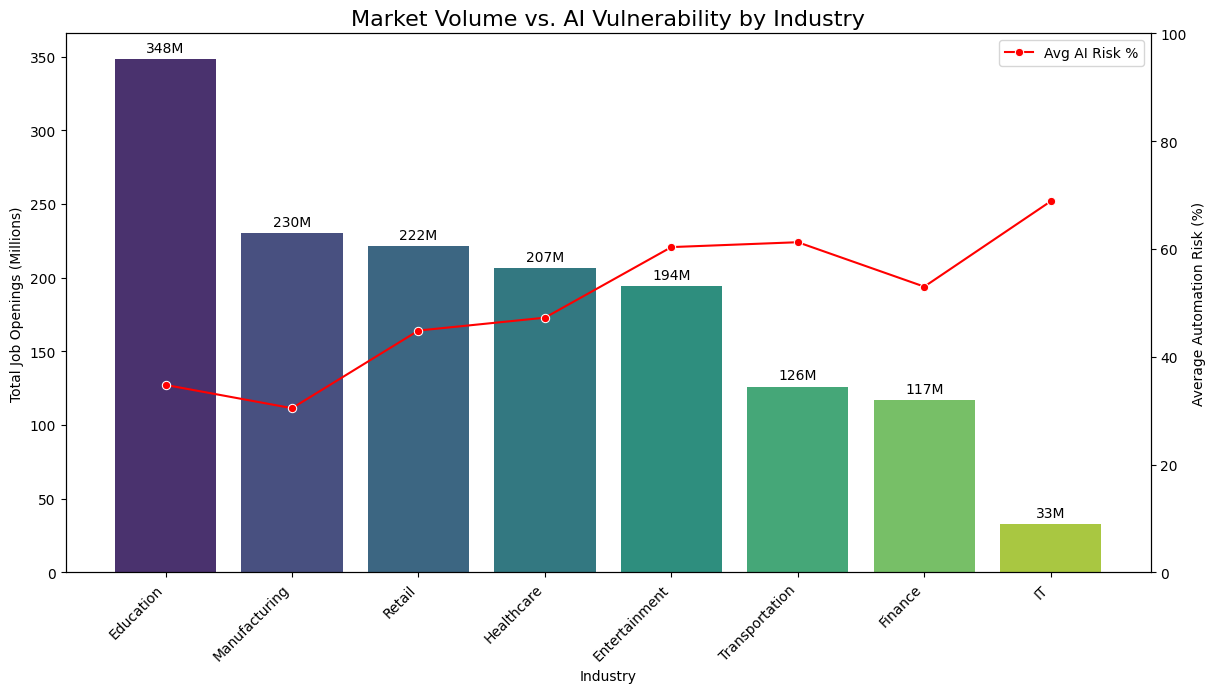

In [102]:
industry_stats = combined_nonull.groupby('industry_x').agg({
    'job_openings_2024': 'sum',
    'automation_risk_percent': 'mean'
}).sort_values('job_openings_2024', ascending=False).head(15)

industry_stats['job_openings_m'] = industry_stats['job_openings_2024'] / 1_000_000

# Plotting
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x=industry_stats.index, 
    y=industry_stats['job_openings_m'], 
    palette='viridis'
)

# Adding a second axis for the Risk line
ax2 = ax.twinx()
sns.lineplot(
    x=industry_stats.index, 
    y=industry_stats['automation_risk_percent'], 
    color='red', 
    marker='o', 
    ax=ax2, 
    label='Avg AI Risk %'
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Market Volume vs. AI Vulnerability by Industry', fontsize=16)
ax.set_ylabel('Total Job Openings (Millions)')
ax2.set_ylabel('Average Automation Risk (%)')
ax.set_xlabel('Industry')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0fM', padding=3, fontsize=10)
ax2.set_ylim(0, 100) # Ensure risk scale is 0-100

plt.show()


The barplot shows the total number of job openings in each industry. The y axis on the right side represents the average AI automation risk percentage.  The line highlighted in red reveals an inverse relationship between average AI risk and the total job openings available for the respective industry.

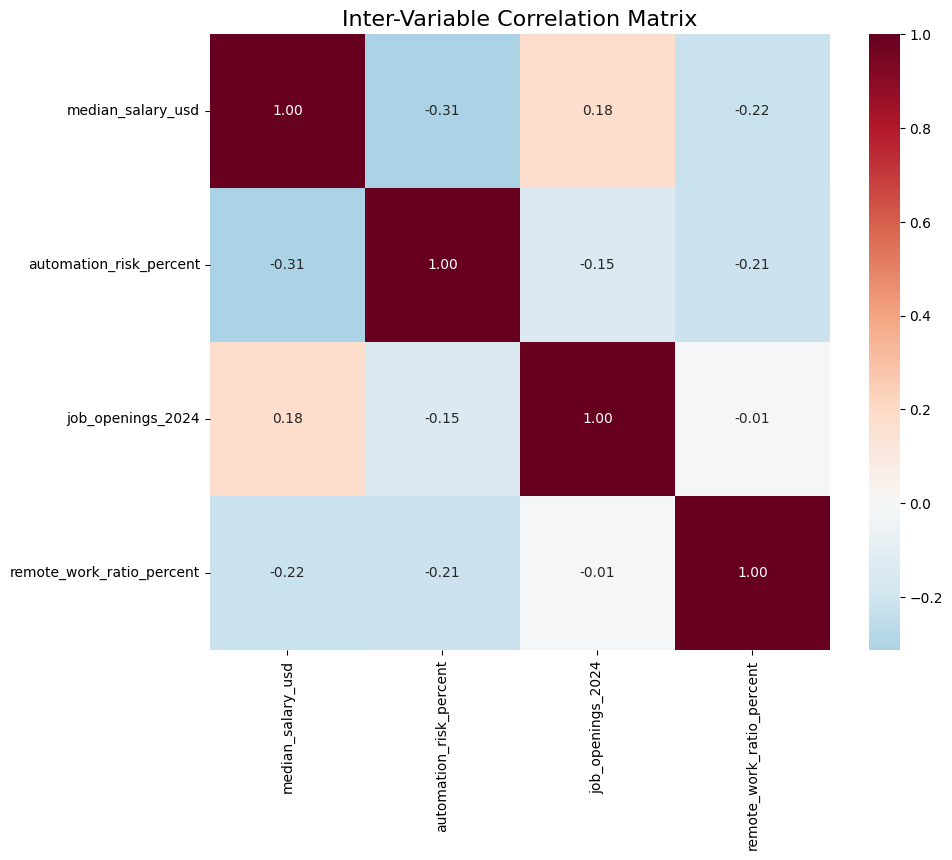

In [103]:
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix for numerical columns
corr = combined_nonull[['median_salary_usd', 'automation_risk_percent', 'job_openings_2024', 'remote_work_ratio_percent']].corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, fmt=".2f")

plt.title('Inter-Variable Correlation Matrix', fontsize=16)
plt.show()

The correlation heatmap that there is not a significant correlation between the variables.  This was included to ensure that the multicollinearity assumption was satisfied for regression analysis.

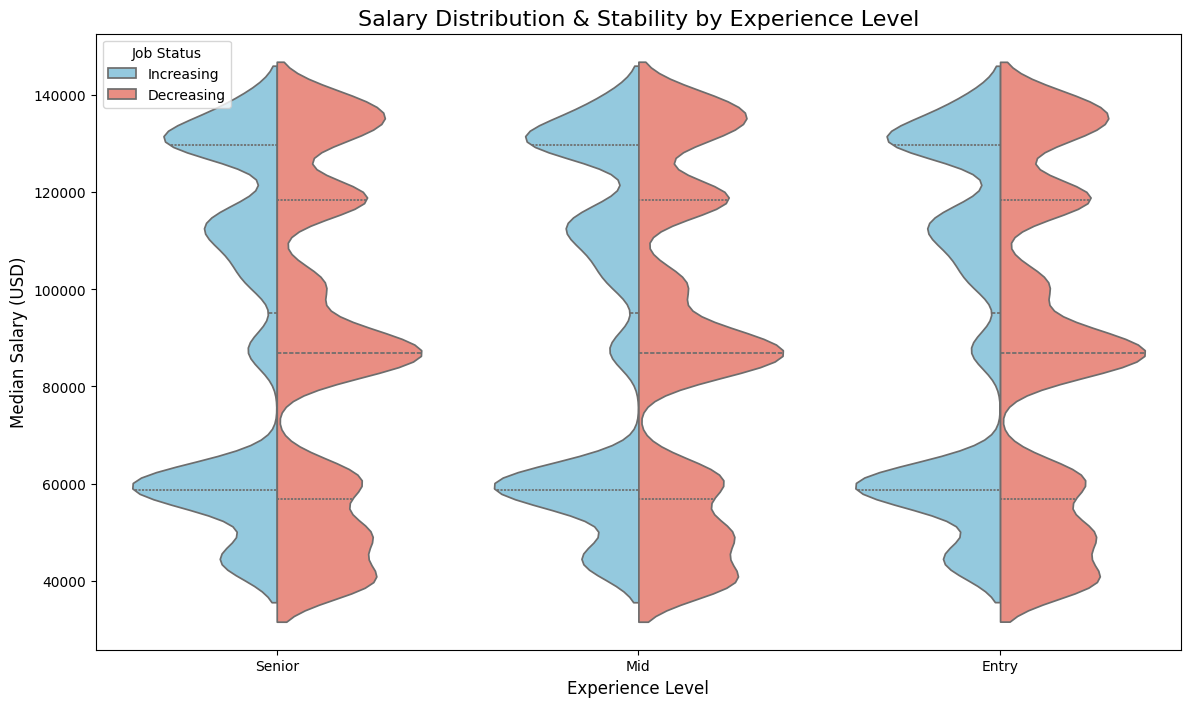

In [104]:
plt.figure(figsize=(14, 8))

# A Violin plot shows the density—where most people are actually getting paid
sns.violinplot(
    data=combined_nonull, 
    x='experience_level', 
    y='median_salary_usd', 
    hue='job_status', 
    split=True,       # This merges the two halves of the violin for direct comparison
    inner="quart",    # Shows the median and quartiles inside the violin
    palette={'Increasing': 'skyblue', 'Decreasing': 'salmon'}
)

plt.title('Salary Distribution & Stability by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Median Salary (USD)', fontsize=12)
plt.legend(title='Job Status', loc='upper left')

plt.show()

The violin plot shows that median salary is evenly distributed across the three experience levels.  Interestingly, there is a greater density of high paying positions for jobs that are decreasing due to AI adoption.  This suggests that high-compensation roles may currently be primary targets for AI-driven cost cutting, particularly for salaries in the $80,000-$100,000 range, with "Increasing" sectors being characterized by more modest pay scales on average.  